In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/archive/feature_time_48k_2048_load_1.csv")
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [3]:
df.shape
df.columns


Index(['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest',
       'form', 'fault'],
      dtype='object')

In [5]:
df['fault'].value_counts()


fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
IR_007_1      230
IR_014_1      230
IR_021_1      230
OR_007_6_1    230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Name: count, dtype: int64

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/archive/feature_time_48k_2048_load_1.csv")

def extract_severity(fault):
    if fault.startswith("Normal"):
        return 0.0
    # extract numeric part like 007, 014, 021
    sev = fault.split("_")[1]
    return float(sev) / 21.0  # normalize to [0, 1]

df["severity"] = df["fault"].apply(extract_severity)

df[["fault", "severity"]].drop_duplicates().sort_values("severity")


,fault,severity
2070,Normal_1,0.000000
0,Ball_007_1,0.333333
1380,OR_007_6_1,0.333333
690,IR_007_1,0.333333
1610,OR_014_6_1,0.666667
920,IR_014_1,0.666667
230,Ball_014_1,0.666667
460,Ball_021_1,1.000000
1150,IR_021_1,1.000000
1840,OR_021_6_1,1.000000


In [7]:
healthy_df = df[df["severity"] == 0.0]

healthy_df["rms"].describe()


count    230.000000
mean       0.066265
std        0.002334
min        0.061067
25%        0.064666
50%        0.066177
75%        0.067849
max        0.073115
Name: rms, dtype: float64

In [8]:
grouped = (
    df.groupby("severity")["rms"]
      .agg(["mean", "std"])
      .reset_index()
)

grouped


,severity,mean,std
0,0.000000,0.066265,0.002334
1,0.333333,0.491976,0.405824
2,0.666667,0.157293,0.041489
3,1.000000,0.469607,0.212656


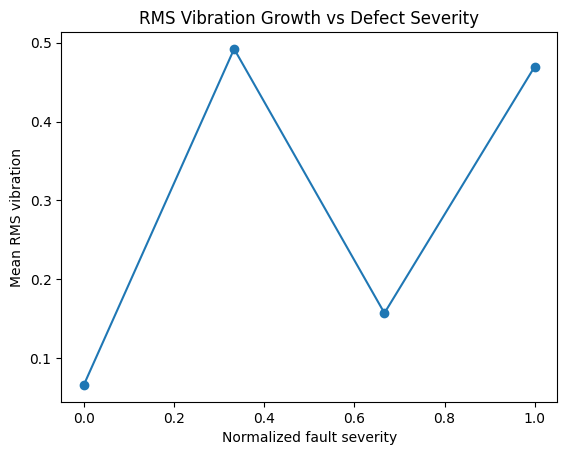

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(grouped["severity"], grouped["mean"], marker="o")
plt.xlabel("Normalized fault severity")
plt.ylabel("Mean RMS vibration")
plt.title("RMS Vibration Growth vs Defect Severity")
plt.show()


In [10]:
grouped["cv"] = grouped["std"] / grouped["mean"]
grouped


,severity,mean,std,cv
0,0.000000,0.066265,0.002334,0.035216
1,0.333333,0.491976,0.405824,0.824885
2,0.666667,0.157293,0.041489,0.263767
3,1.000000,0.469607,0.212656,0.452839


In [11]:
crest_stats = (
    df.groupby("severity")["crest"]
      .describe()
)

crest_stats


,count,mean,std,min,25%,50%,75%,max
severity,,,,,,,,
0.000000,230.0,3.093996,0.252527,2.541028,2.899951,3.056183,3.266608,3.836175
0.333333,690.0,4.313663,0.809220,2.537506,3.533838,4.485720,4.948363,6.131491
0.666667,690.0,4.053883,0.878584,2.639335,3.349361,3.914876,4.501073,7.360551
1.000000,690.0,4.511555,1.553948,2.428511,3.285869,3.870475,5.817469,8.821577


<Figure size 640x480 with 0 Axes>

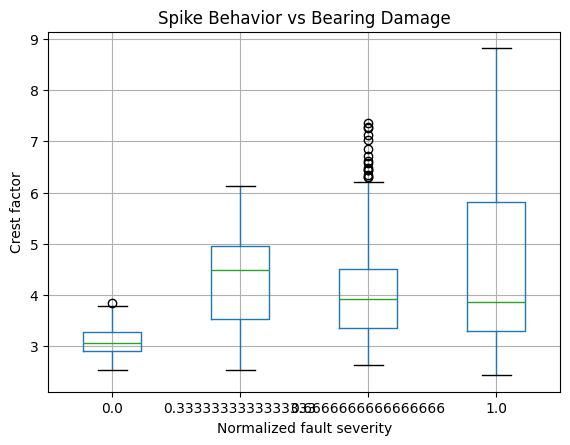

In [12]:
plt.figure()
df.boxplot(column="crest", by="severity")
plt.xlabel("Normalized fault severity")
plt.ylabel("Crest factor")
plt.title("Spike Behavior vs Bearing Damage")
plt.suptitle("")
plt.show()


In [13]:
features = ["rms", "sd", "kurtosis"]

df.groupby("severity")[features].mean()


,rms,sd,kurtosis
severity,,,
0.000000,0.066265,0.065046,-0.095627
0.333333,0.491976,0.491371,2.741766
0.666667,0.157293,0.156128,1.339074
1.000000,0.469607,0.469491,4.832514
